In [1]:
%run eval.ipynb
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from utils import eval, visual, save, save_model
from model import Model
import warnings
warnings.filterwarnings('ignore')

In [2]:

np.random.seed(42)
data = pd.read_csv('data/compound_feat5.csv').iloc[:,1:]
data['target'] = pd.qcut(data['label'], q=10, labels=False)
train_df, test_df = train_test_split(data, test_size=0.2, stratify=data['target'], random_state=43)


samples = train_df[train_df['label'] < 1.2]
train_df = pd.concat([train_df, samples], axis=0)
#train_df = pd.concat([train_df, samples], axis=0)
train_df = train_df.sample(frac=1).reset_index(drop=True)


train_df = train_df.drop(columns=['target'])
test_df = test_df.drop(columns=['target'])


X_train, y_train = train_df.iloc[:, :-1], train_df.iloc[:, -1:].values
X_test, y_test = test_df.iloc[:, :-1], test_df.iloc[:, -1:].values


print('train data:', X_train.shape)
print('X_test data:', X_test.shape)

train data: (290, 29)
X_test data: (59, 29)


# 1.DecisionTree_model

DecisionTree train: 
 r2: 1.0  rmse: 0.0  mse:0.0 error_ratio:0.0% mae:0.0
DecisionTree test: 
 r2: 0.6726303620777414  rmse: 0.19810115546510615 mse:0.03924406779661016 error_ratio:10.25% mae:0.13186440677966102
save result successful！


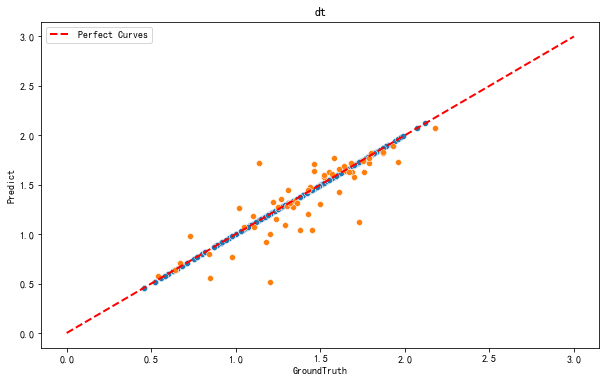

In [4]:

DecisionTree_model = DecisionTreeRegressor(random_state=25)

model = Model(DecisionTree_model, X_train, X_test, y_train, y_test, 'DecisionTree', '5')


visual(DecisionTree_model, 'dt', X_train, X_test, y_train, y_test)


DecisionTree_tuning train: 
 r2: 0.9233205913539368  rmse: 0.1008991843262657  mse:0.010180645397705742 error_ratio:6.27% mae:0.07458122490536284
DecisionTree_tuning test: 
 r2: 0.6377285946575836  rmse: 0.20839382090980657 mse:0.043427984593388536 error_ratio:11.79% mae:0.14830142785651262
save result successful！


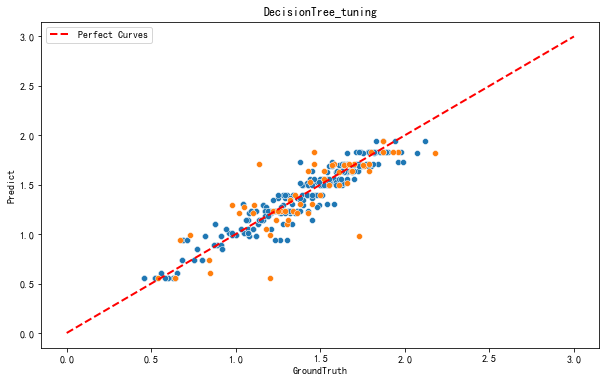

In [4]:
import numpy as np
from sklearn.model_selection import GridSearchCV

DT_param = {'max_depth':[3,5,7,9,10,11],
              'max_leaf_nodes':[25,30,40,50,60,70],
              'min_samples_leaf':[2,3,4,5,6,7,8],
}


D_model = DecisionTreeRegressor()
D_grid_search = GridSearchCV(D_model,DT_param,scoring='neg_mean_squared_error',cv=5)

model = Model(D_grid_search, X_train, X_test, y_train, y_test, 'DecisionTree_tuning', '5')

visual(model, 'DecisionTree_tuning', X_train, X_test, y_train, y_test)
    

# 2.RandomForest_model

RandomForest train: 
 r2: 0.9864765122548089  rmse: 0.042373333758309775  mse:0.0017954994137931147 error_ratio:1.96% mae:0.025923103448276
RandomForest test: 
 r2: 0.8366093061302932  rmse: 0.13995276018980765 mse:0.01958677508474581 error_ratio:7.6% mae:0.09951355932203401
save result successful！


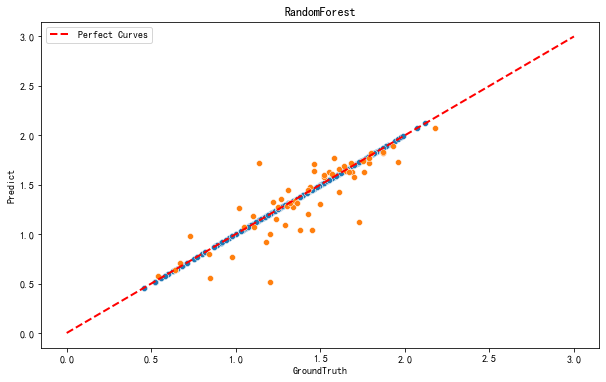

In [5]:
RandomForest_model =RandomForestRegressor(random_state=2024)  #n_estimators=300, max_depth=10, random_state=2023

model = Model(RandomForest_model, X_train, X_test, y_train, y_test, 'RandomForest', '5')

visual(DecisionTree_model, 'RandomForest', X_train, X_test, y_train, y_test)

RandomForest_tuning train: 
 r2: 0.9324564161327273  rmse: 0.09469789562673059  mse:0.00896769143613116 error_ratio:5.93% mae:0.0720080187397856
RandomForest_tuning test: 
 r2: 0.8143937741206937  rmse: 0.14916402013535593 mse:0.022249904902940865 error_ratio:8.37% mae:0.11049918842028125
save result successful！


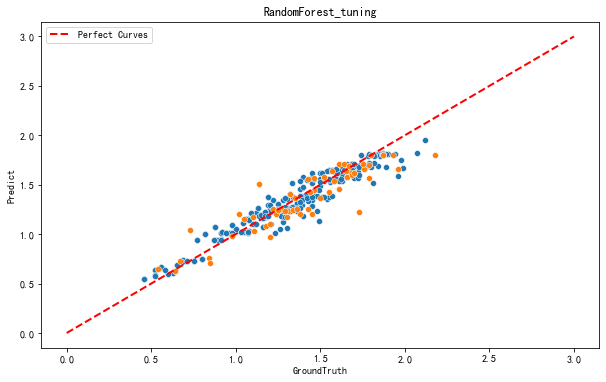

In [3]:
from sklearn.model_selection import GridSearchCV
rf_param = {
    'n_estimators': [300,400,500],
    'max_depth': [3,4,5],
#     'ccp_alpha': [0.0,0.05,0.1],
    'random_state': [2024]
}

rf_model = RandomForestRegressor(random_state=2024)

rf_grid_search = GridSearchCV(rf_model, rf_param, cv=5, scoring='neg_mean_squared_error')

rf_grid_search.fit(X_train, y_train)


model = Model(rf_grid_search, X_train, X_test, y_train, y_test, 'RandomForest_tuning', '5')

visual(model, 'RandomForest_tuning', X_train, X_test, y_train, y_test)

# 3. Linear_model

linear_reg train: 
 r2: 0.8208607105084497  rmse: 0.15422106632122878  mse:0.023784137297256844 error_ratio:10.61% mae:0.11930348786106941
linear_reg test: 
 r2: 0.8136979372545762  rmse: 0.1494433661678067 mse:0.022333319691565153 error_ratio:9.43% mae:0.11982736560878392
save result successful！


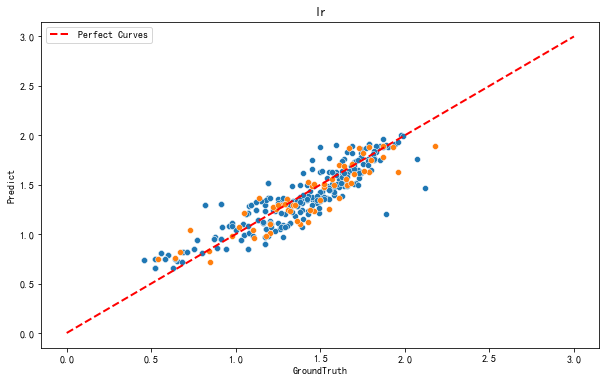

In [7]:
Linear_model = LinearRegression()

model = Model(Linear_model, X_train, X_test, y_train, y_test, 'linear_reg', '5')

visual(model, 'lr', X_train, X_test, y_train, y_test)

linear_reg_tuning train: 
 r2: 0.8208607105084497  rmse: 0.15422106632122878  mse:0.023784137297256844 error_ratio:10.61% mae:0.11930348786106941
linear_reg_tuning test: 
 r2: 0.8136979372545762  rmse: 0.1494433661678067 mse:0.022333319691565153 error_ratio:9.43% mae:0.11982736560878392
save result successful！


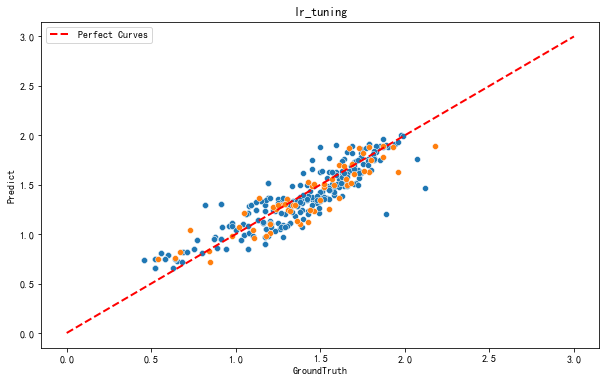

In [8]:
from sklearn.model_selection import GridSearchCV

L_para = {'fit_intercept': [True, False],  
          'normalize': [True, False],      
    
}

L_model = LinearRegression()
L_grid_search = GridSearchCV(L_model,L_para,scoring='neg_mean_squared_error',cv=5)

model = Model(L_grid_search, X_train, X_test, y_train, y_test, 'linear_reg_tuning', '5')

visual(model, 'lr_tuning', X_train, X_test, y_train, y_test)
    

# 4. Lasso

lasso train: 
 r2: 0.6049220056521996  rmse: 0.22902858932695985  mse:0.05245409472909723 error_ratio:16.43% mae:0.1775410604845355
lasso test: 
 r2: 0.550376767587044  rmse: 0.23216255860898835 mse:0.05389945361987195 error_ratio:13.61% mae:0.16602730712475286
save result successful！


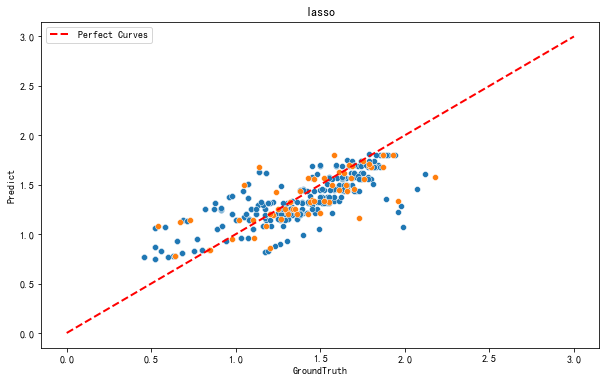

In [4]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(random_state=2024)  # alpha=0.9

model = Model(lasso_model, X_train, X_test, y_train, y_test, 'lasso', '5')

visual(model, 'lasso', X_train, X_test, y_train, y_test)

lasso_tuning train: 
 r2: 0.7143371436315095  rmse: 0.1947489680795843  mse:0.03792716056806295 error_ratio:13.85% mae:0.15171838411696634
lasso_tuning test: 
 r2: 0.6360333438654793  rmse: 0.208880841766722 mse:0.043631206057174354 error_ratio:12.29% mae:0.15190340108803738
save result successful！


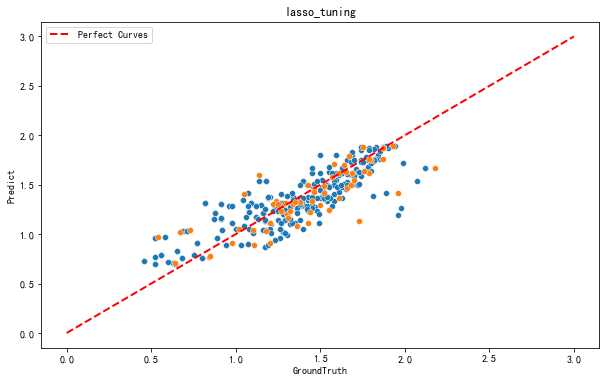

In [5]:
from sklearn.model_selection import GridSearchCV

La_para = {'alpha': [0.001,0.005,0.05],
           'selection': ['cyclic']
}

La_model = Lasso(random_state=2024)
La_grid_search = GridSearchCV(La_model,La_para,scoring='neg_mean_squared_error',cv=5)
La_grid_search.fit(X_train, y_train)


model = Model(La_grid_search, X_train, X_test, y_train, y_test, 'lasso_tuning', '5')

visual(model, 'lasso_tuning', X_train, X_test, y_train, y_test)

# 5. ridge_model

ridge train: 
 r2: 0.779324102233527  rmse: 0.17116924259765548  mse:0.029298909611455034 error_ratio:11.97% mae:0.13497900266316762
ridge test: 
 r2: 0.7477147090475147  rmse: 0.17390568319335803 mse:0.030243186646948608 error_ratio:10.47% mae:0.13141142667363997
save result successful！


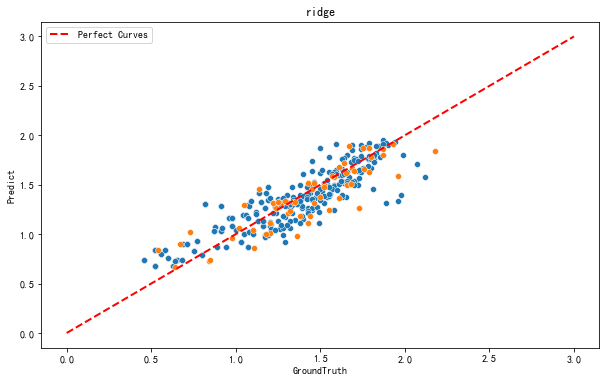

In [6]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(random_state=2024, alpha=5)  # alpha=0.5 

model = Model(ridge_model, X_train, X_test, y_train, y_test, 'ridge', '5')

visual(model, 'ridge', X_train, X_test, y_train, y_test)

ridge_tuning train: 
 r2: 0.7687564821370954  rmse: 0.17521975216674435  mse:0.03070196154937531 error_ratio:12.22% mae:0.13774999850543046
ridge_tuning test: 
 r2: 0.729111697878587  rmse: 0.18020338107338857 mse:0.0324732585502809 error_ratio:10.73% mae:0.13468925339197937
save result successful！


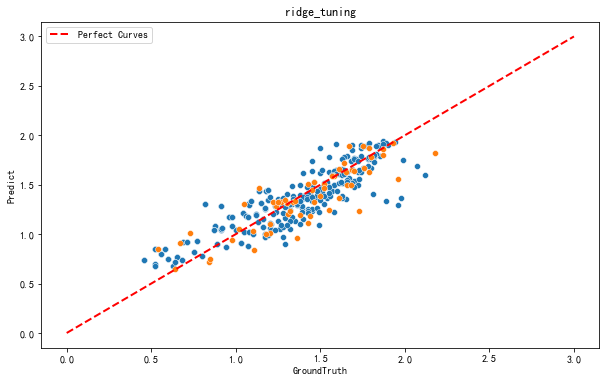

In [7]:
from sklearn.model_selection import GridSearchCV

R_para = {
    'alpha': [0.001, 0.01,0.1,0.5,5,10],  
}

R_model = Ridge(random_state=2024)
R_grid_search = GridSearchCV(R_model,R_para,scoring='neg_mean_squared_error',cv=5)

R_grid_search.fit(X_train, y_train)


model = Model(R_grid_search, X_train, X_test, y_train, y_test, 'ridge_tuning', '5')

visual(model, 'ridge_tuning', X_train, X_test, y_train, y_test)

# 6. svm_model

svm train: 
 r2: 0.7802417931133342  rmse: 0.17081296422415712  mse:0.029177068747043185 error_ratio:10.94% mae:0.12833214213062816
svm test: 
 r2: 0.7819129467921411  rmse: 0.1616898476379543 mse:0.026143606829184877 error_ratio:10.43% mae:0.12908761883865968
save result successful！


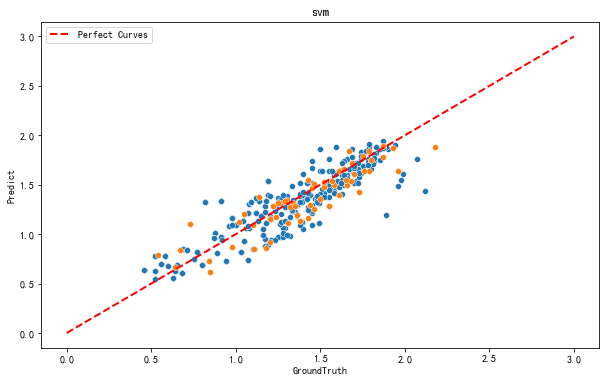

In [8]:

from sklearn import svm
svm_model = svm.SVR(kernel='linear',degree=1,gamma='scale',tol=0.001)

model = Model(svm_model, X_train, X_test, y_train, y_test, 'svm', '5')

visual(model, 'svm', X_train, X_test, y_train, y_test)

svm_tuning train: 
 r2: 0.7813333702701182  rmse: 0.17038820728661513  mse:0.029032141182346528 error_ratio:10.8% mae:0.12051133299129053
svm_tuning test: 
 r2: 0.5725105242308366  rmse: 0.22637607378350774 mse:0.05124612678163614 error_ratio:12.54% mae:0.15588090618904651
save result successful！


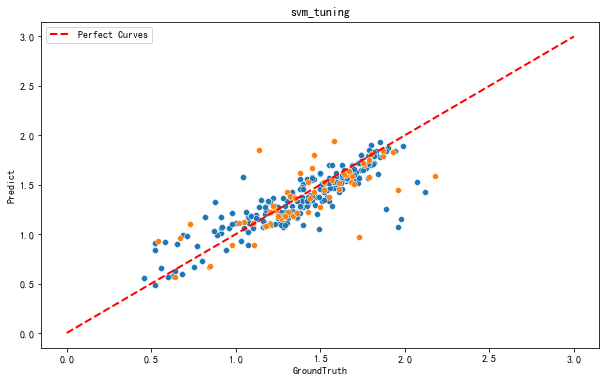

In [9]:
from sklearn.model_selection import GridSearchCV

S_model = svm.SVR()

S_para = {
     'C': [0.1, 1, 10],
    'tol': [0.001, 0.002],
}


S_grid_search = GridSearchCV(S_model,S_para,scoring='neg_mean_squared_error',cv=5)
S_grid_search.fit(X_train, y_train)




model = Model(S_grid_search, X_train, X_test, y_train, y_test, 'svm_tuning', '5')

visual(model, 'svm_tuning', X_train, X_test, y_train, y_test)


# 7. elastic net

elastic_net train: 
 r2: 0.632066644557179  rmse: 0.2210206534047226  mse:0.04885012923145052 error_ratio:15.72% mae:0.16997542994425582
elastic_net test: 
 r2: 0.5502392131869103  rmse: 0.23219806893971265 mse:0.05391594321933155 error_ratio:13.48% mae:0.16491059949159828
save result successful！


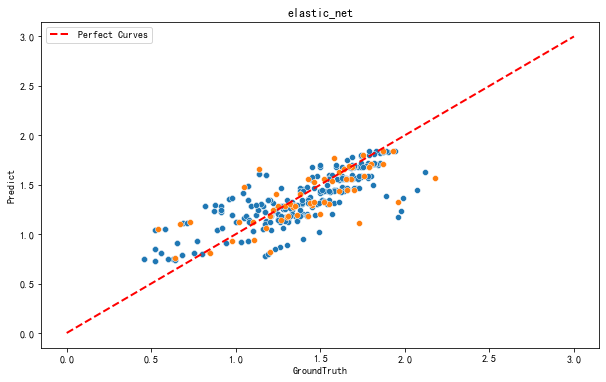

In [15]:
from sklearn.linear_model import ElasticNet

elastic_model = ElasticNet(random_state=2024)   # selection='cyclic'

model = Model(elastic_model, X_train, X_test, y_train, y_test, 'elastic_net', '5')

visual(model, 'elastic_net', X_train, X_test, y_train, y_test)

elastic_net_tuning train: 
 r2: 0.7364756913227178  rmse: 0.18705039053245362  mse:0.03498784859834341 error_ratio:13.21% mae:0.14629484860711828
elastic_net_tuning test: 
 r2: 0.6794849528082353  rmse: 0.19601622506899244 mse:0.0384223604902979 error_ratio:11.54% mae:0.1431782911327192
save result successful！


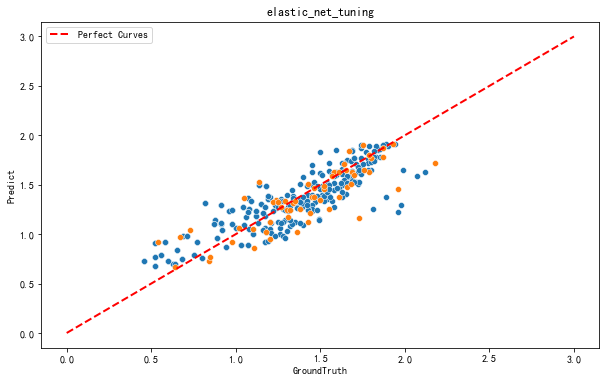

In [10]:
##from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np
from sklearn.model_selection import GridSearchCV



EN_para = {
    'alpha': [0,0.1,0.5,1],         
    'l1_ratio': [0.0001,0.001,0.005,0.05,0.1,0.5,0.9],       
}

EN_model = ElasticNet()
EN_grid_search = GridSearchCV(EN_model,EN_para,scoring='neg_mean_squared_error', cv=5)

EN_grid_search.fit(X_train, y_train)

model = Model(EN_grid_search, X_train, X_test, y_train, y_test, 'elastic_net_tuning', '5')

visual(model, 'elastic_net_tuning', X_train, X_test, y_train, y_test)

# 8. gaussian_model

gaussian train: 
 r2: 0.9217070384965314  rmse: 0.10195526045141773  mse:0.010394875133716425 error_ratio:6.39% mae:0.07666782791161075
gaussian test: 
 r2: 0.8637046953874601  rmse: 0.12782277947034226 mse:0.01633866295152375 error_ratio:7.31% mae:0.09538032766510497
save result successful！


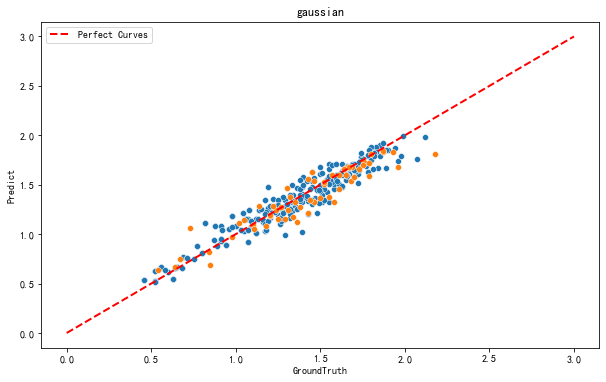

In [7]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.model_selection import GridSearchCV

gaussian_model = GaussianProcessRegressor(kernel = 1.0 * RBF(length_scale=1.0), alpha=0.02, random_state=2024)

model = Model(gaussian_model, X_train, X_test, y_train, y_test, 'gaussian', '5')

visual(model, 'gaussian', X_train, X_test, y_train, y_test)

GaussianProcessRegressor_tuning train: 
 r2: 0.9217070384965314  rmse: 0.10195526045141773  mse:0.010394875133716425 error_ratio:6.39% mae:0.07666782791161075
GaussianProcessRegressor_tuning test: 
 r2: 0.8637046953874601  rmse: 0.12782277947034226 mse:0.01633866295152375 error_ratio:7.31% mae:0.09538032766510497
save result successful！


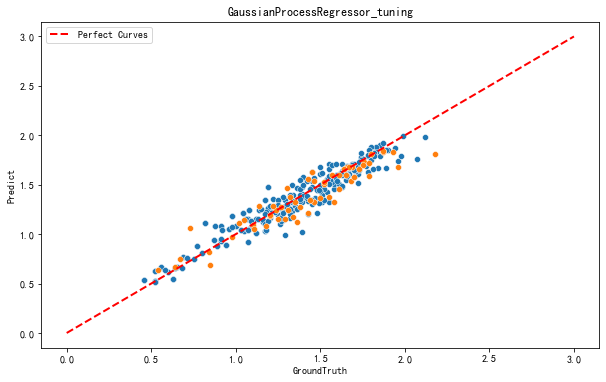

In [11]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern
from sklearn.model_selection import GridSearchCV


kernel_1 = 1 * RBF(length_scale=1)
kernel_2 = 1.0 * Matern(length_scale=1.0, nu=1.5)

GS_grid = {
    "kernel": [kernel_1],
    "alpha": [0.01,0.02,0.03],
#     "n_restarts_optimizer": [1],
    'random_state':[2024],
}


gpr = GaussianProcessRegressor()

GS_grid_search = GridSearchCV(gpr, GS_grid, scoring='neg_mean_squared_error', cv=5)

GS_grid_search.fit(X_train, y_train)


model = Model(GS_grid_search, X_train, X_test, y_train, y_test, 'GaussianProcessRegressor_tuning', '5')

visual(model, 'GaussianProcessRegressor_tuning', X_train, X_test, y_train, y_test)

In [35]:
GaussianProcessRegressor?

# 9. KNN

knn train: 
 r2: 0.8563176843834894  rmse: 0.13811789067364855  mse:0.01907655172413793 error_ratio:7.37% mae:0.09097931034482759
knn test: 
 r2: 0.6884041662952237  rmse: 0.19326963688684493 mse:0.03735315254237289 error_ratio:10.79% mae:0.14037288135593223
save result successful！


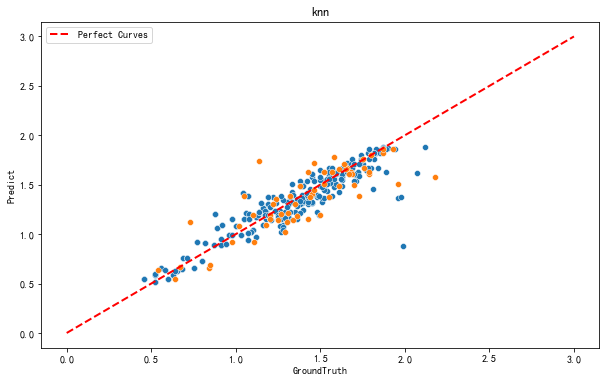

In [19]:
from sklearn.neighbors import KNeighborsRegressor

KNeighbors_model = KNeighborsRegressor()

model = Model(KNeighbors_model, X_train, X_test, y_train, y_test, 'knn', '5')

visual(model, 'knn', X_train, X_test, y_train, y_test)

knn_tuning train: 
 r2: 0.9214502737879009  rmse: 0.10212230665844452  mse:0.01042896551724138 error_ratio:5.6% mae:0.0719080459770115
knn_tuning test: 
 r2: 0.7080024828893964  rmse: 0.18709293540468802 mse:0.03500376647834277 error_ratio:9.89% mae:0.13118644067796614
save result successful！


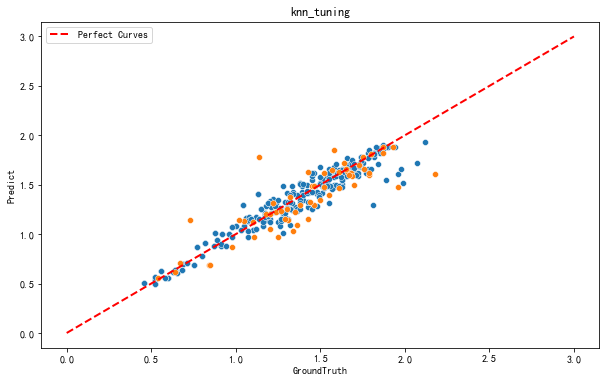

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process.kernels import RBF, Matern
from sklearn.model_selection import GridSearchCV

knn_grid = {
    'n_neighbors': [3,4,5],
#     'weights': ['uniform', 'distance'],
#     'metric': ['euclidean', 'manhattan']
    'p': [1, 2],
}


knn = KNeighborsRegressor()

knn_grid_search = GridSearchCV(knn, knn_grid, scoring='neg_mean_squared_error', cv=5)

knn_grid_search.fit(X_train, y_train)


model = Model(knn_grid_search, X_train, X_test, y_train, y_test, 'knn_tuning', '5')

visual(model, 'knn_tuning', X_train, X_test, y_train, y_test)


In [20]:
KNeighborsRegressor?

# 10.XGBoost 

XGBoost train: 
 r2: 0.9998785357555331  rmse: 0.004015803967762291  mse:1.6126681507495363e-05 error_ratio:0.19% mae:0.0025690118444376977
XGBoost test: 
 r2: 0.9436395658752087  rmse: 0.08219681213003546 mse:0.006756315924340345 error_ratio:4.14% mae:0.051635825068263676
save result successful！


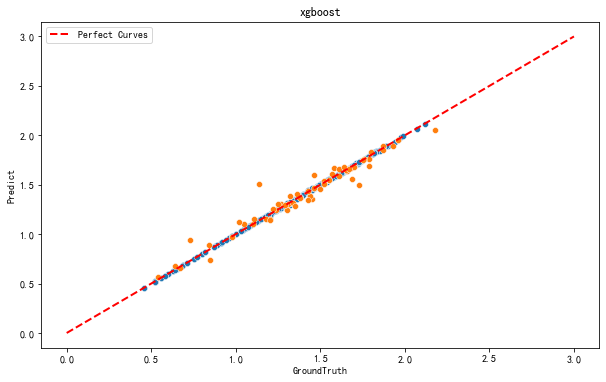

In [21]:
import xgboost as xgb
from xgboost import XGBRegressor

XGBoost_model = XGBRegressor(random_state=2024)

model = Model(XGBoost_model, X_train, X_test, y_train, y_test, 'XGBoost', '5')

visual(model, 'xgboost', X_train, X_test, y_train, y_test)

XGBoost_tuning train: 
 r2: 0.9673329437227359  rmse: 0.06585720243871136  mse:0.004337171113053409 error_ratio:3.91% mae:0.048377333262871046
XGBoost_tuning test: 
 r2: 0.9253370496179252  rmse: 0.09460637092505099 mse:0.008950365419608333 error_ratio:5.46% mae:0.0734816126500146
save result successful！


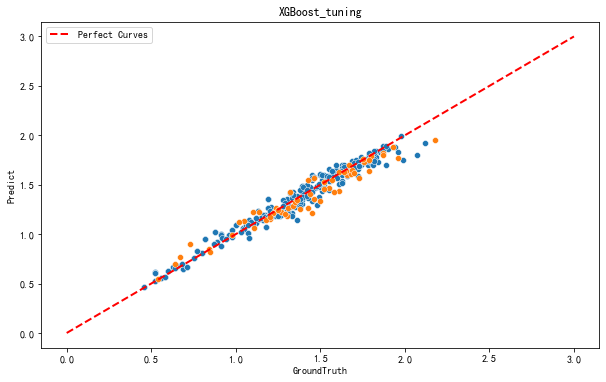

In [13]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
X_grid = {
 'n_estimators': [20,30,40],
    'max_depth': [2,3,4],
    'random_state':[2024],
    'subsample': [0.7,0.75],
    'reg_alpha': [0.1,0.2],

    
}

X_model = XGBRegressor()

X_grid_search = GridSearchCV(X_model,X_grid,scoring='neg_mean_squared_error',cv=5)

X_grid_search.fit(X_train, y_train)


model = Model(X_grid_search, X_train, X_test, y_train, y_test, 'XGBoost_tuning', '5')

visual(model, 'XGBoost_tuning', X_train, X_test, y_train, y_test)

In [4]:
save_model(X_grid_search, 'XGBoost_tuning_5')

save XGBoost_tuning_5 model successful
